Bands crossing the target energy (0.0): ['nbnd_439', 'nbnd_440', 'nbnd_441', 'nbnd_442']


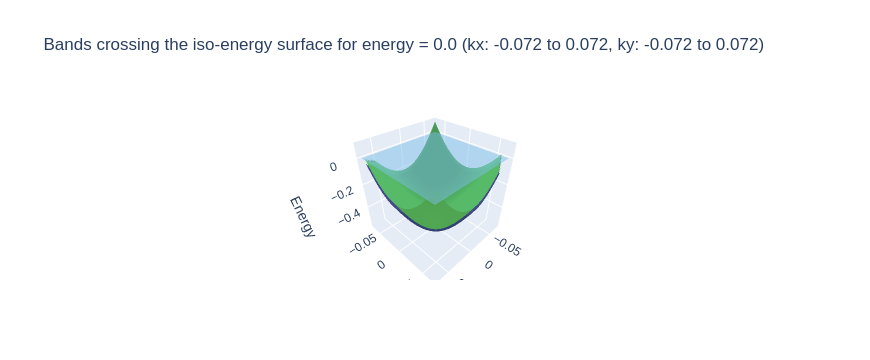

In [9]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
from scipy.interpolate import griddata

# Load the dataset
file_path = 'band_data_fermi_subtracted_with_three_digit_prec.csv'
df = pd.read_csv(file_path)

# Define the range for kx and ky
kx_min = -0.072  # Set your desired min value for kx
kx_max = 0.072 # Set your desired max value for kx
ky_min = -0.072  # Set your desired min value for ky
ky_max = 0.072 # Set your desired max value for ky

# Filter the data based on the kx and ky range
df_filtered = df[(df['kx'] >= kx_min) & (df['kx'] <= kx_max) &
                 (df['ky'] >= ky_min) & (df['ky'] <= ky_max)]

# Extract the filtered kx and ky
kx = df_filtered['kx']
ky = df_filtered['ky']

# Define the target iso-energy level
target_energy = 0.0  # Set this to the energy level you're interested in

# List to store bands that cross the target energy
crossing_bands = []

# Loop through all the columns for the bands (assuming band columns start from 'nbnd_1')
for col in df_filtered.columns:
    if col.startswith('nbnd_'):
        energy = df_filtered[col]
        # Check if the band crosses the target energy by checking if min < target_energy < max
        if energy.min() <= target_energy <= energy.max():
            crossing_bands.append(col)

# If no band crosses the target energy, print a message and stop
if not crossing_bands:
    print(f"No bands cross the target energy of {target_energy}.")
else:
    print(f"Bands crossing the target energy ({target_energy}): {crossing_bands}")

    # Create a 3D plot for the bands and the iso-energy surface
    fig = go.Figure()

    # Create a grid for kx and ky within the filtered range
    kx_range = np.linspace(kx.min(), kx.max(), 100)
    ky_range = np.linspace(ky.min(), ky.max(), 100)
    kx_grid, ky_grid = np.meshgrid(kx_range, ky_range)

    # Plot each band as a surface
    for i, band in enumerate(crossing_bands):
        energy = df_filtered[band]

        # Interpolate the energy values on a grid for continuous surface plotting
        energy_grid = griddata((kx, ky), energy, (kx_grid, ky_grid), method='cubic')
        
        # Plot the band as a surface
        fig.add_trace(go.Surface(
            x=kx_grid,
            y=ky_grid,
            z=energy_grid,
            colorscale='Viridis',
            opacity=0.8,
            name=f'Band {band}',
            showscale=False,
            surfacecolor=np.full_like(energy_grid, i),  # Use the band index for color differentiation
            cmin=0,
            cmax=len(crossing_bands)
        ))

    # Plot the iso-energy surface as a plane
    iso_energy_surface = np.full_like(kx_grid, target_energy)

    fig.add_trace(go.Surface(
        x=kx_grid,
        y=ky_grid,
        z=iso_energy_surface,
        colorscale='Blues',
        opacity=0.5,
        showscale=False,
        name='Iso-energy surface'
    ))

    # Add labels and title
    fig.update_layout(scene=dict(
                        xaxis_title='kx',
                        yaxis_title='ky',
                        zaxis_title='Energy'),
                      title=f"Bands crossing the iso-energy surface for energy = {target_energy} (kx: {kx_min} to {kx_max}, ky: {ky_min} to {ky_max})")

    # Show the plot
    fig.show()
